# 1. Image Classification using CNN

(1) 모듈 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

C:\Users\user\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\user\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


(2) 데이터셋 불러오기

In [2]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8,
                                          shuffle=True)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_set, batch_size=8,
                                         shuffle=False)

#데이터 클래스
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


(3) 데이터 확인

 deer  frog plane plane horse   car   cat   cat


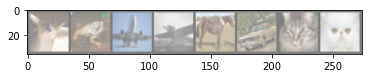

In [3]:
# 이미지를 보여주기 위한 함수
def img_show(img):
    img = img / 2 + 0.5     # unnormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = dataiter.next()

# 라벨과 이미지 보여주기
img_show(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))
plt.show()

(4) CNN 모델 정의하기

In [7]:
a=torch.Tensor(1,3,32,32)
conv1 = nn.Conv2d(3,6,5)
maxpool = nn.MaxPool2d(2)
out = conv1(a)
print(out.shape)
out = maxpool(out)
print(out.shape)
conv2 = nn.Conv2d(6,16,5)
out = conv2(out)
print(out.shape)
out = maxpool(out)
print(out.shape)


torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 14, 14])
torch.Size([1, 16, 10, 10])
torch.Size([1, 16, 5, 5])


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        '''your code here'''
        self.conv1 = nn.Conv2d(3,6,kernel_size=5)
        # input channels = 3, output channels = 6, kernel size = 5, convolution layer
        '''your code here'''
        self.pool = nn.MaxPool2d(2)
        # kernel size = 2, stride = 2, padding = 0, max-pooling layer
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        # input features, output features
        self.fc2 = nn.Linear(120, 84)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        '''your code here'''
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

net = Net()

In [9]:
net = Net()
a=torch.Tensor(1,3,32,32)
out = net(a)
print(out)

tensor([[-0.0529,  0.0563, -0.0641, -0.0409, -0.1326,  0.1046,  0.0204,  0.0920,
          0.1001, -0.0363]], grad_fn=<AddmmBackward0>)


(5) Loss와 Optimizer 정의하기

In [10]:
# SGD optimizer with learning rate = 0.001, momentum = 0.9
# cross-entropy loss

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

(6) 모델 학습

In [11]:
for epoch in range(5):  # Iterate many times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Set gradient as 0
        '''your code here'''
        optimizer.zero_grad()

        # Forward + Backpropatation + Optimization
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        '''your code here'''
        loss.backward()
        optimizer.step()
        
        # Print the training loss
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

[1,  1000] loss: 2.302
[1,  2000] loss: 2.300
[1,  3000] loss: 2.277
[1,  4000] loss: 2.053
[1,  5000] loss: 1.880
[1,  6000] loss: 1.780
[2,  1000] loss: 1.658
[2,  2000] loss: 1.618
[2,  3000] loss: 1.565
[2,  4000] loss: 1.538
[2,  5000] loss: 1.510
[2,  6000] loss: 1.472
[3,  1000] loss: 1.438
[3,  2000] loss: 1.403
[3,  3000] loss: 1.404
[3,  4000] loss: 1.391
[3,  5000] loss: 1.359
[3,  6000] loss: 1.342
[4,  1000] loss: 1.300
[4,  2000] loss: 1.279
[4,  3000] loss: 1.274
[4,  4000] loss: 1.252
[4,  5000] loss: 1.244
[4,  6000] loss: 1.242
[5,  1000] loss: 1.190
[5,  2000] loss: 1.170
[5,  3000] loss: 1.189
[5,  4000] loss: 1.201
[5,  5000] loss: 1.156
[5,  6000] loss: 1.182
Finished Training


(7) 모델 테스트

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog
Predicted:    cat  ship  ship  ship  frog  frog   car  frog


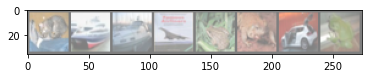

In [12]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
plt.show()
img_show(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

(8) 정답률 계산

In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Hint : Find the condition in classification problem

print('네트워크의 정확도: {} %'.format(
    100 * correct / total))

네트워크의 정확도: 57.48 %


# 2. Time Series Data processing using RNN

(1) 모듈 import

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

(2) 데이터 로드

In [25]:
# Import csv file from your drive.
# from google.colab import files 
# uploaded = files.upload()

# Make sure the your file name matches.
df = pd.read_csv('kospi.csv')

(3) 데이터 확인

In [26]:
# Before preprocessing the dataframe, we need to check if there exists any missing value. 
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [27]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,431.000000,431.000000,431.000000,431.000000,431.000000,4.310000e+02
mean,2122.449765,2134.756032,2106.976497,2121.195427,2121.195427,6.482257e+05
std,159.523899,155.808986,161.926432,159.038127,159.038127,2.593637e+05
min,1474.449951,1516.750000,1439.430054,1457.640015,1457.640015,0.000000e+00
25%,2057.589966,2065.619995,2041.244995,2055.299927,2055.299927,4.406500e+05
50%,2132.379883,2141.270020,2119.070068,2131.239990,2131.239990,6.087000e+05
75%,2211.449951,2220.595092,2196.599976,2209.244995,2209.244995,8.109500e+05
max,2455.280029,2458.169922,2429.939941,2443.580078,2443.580078,1.984200e+06


(4) 데이터 전처리

In [28]:
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] \
  = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])

X = df[['Open','High','Low','Volume']].values 
y = df['Close'].values

def seq_dataset(x, y, seq_length):
  x_seq = []
  y_seq = []
  for i in range(len(x) - seq_length):
    x_seq.append(x[i:i+seq_length])
    y_seq.append(y[i+seq_length])

  # x_seq = np.array(x_seq)
  # y_seq = np.array(y_seq)
  # x_seq = x_seq.reshape(len(x)-seq_length,5,4)
  # y_seq = y_seq.reshape(len(x)-seq_length,1)

  # return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)
  return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq).view(-1,1)
print(seq_dataset(X,y,seq_length=5))

(tensor([[[0.7229, 0.7324, 0.7455, 0.2421],
         [0.7631, 0.7501, 0.7691, 0.2748],
         [0.7519, 0.7457, 0.7693, 0.2416],
         [0.7558, 0.7425, 0.7646, 0.2156],
         [0.7316, 0.7178, 0.7395, 0.1971]],

        [[0.7631, 0.7501, 0.7691, 0.2748],
         [0.7519, 0.7457, 0.7693, 0.2416],
         [0.7558, 0.7425, 0.7646, 0.2156],
         [0.7316, 0.7178, 0.7395, 0.1971],
         [0.7199, 0.7062, 0.7349, 0.2047]],

        [[0.7519, 0.7457, 0.7693, 0.2416],
         [0.7558, 0.7425, 0.7646, 0.2156],
         [0.7316, 0.7178, 0.7395, 0.1971],
         [0.7199, 0.7062, 0.7349, 0.2047],
         [0.7221, 0.7205, 0.7462, 0.2167]],

        ...,

        [[0.9059, 0.9082, 0.9257, 0.4084],
         [0.8984, 0.8960, 0.9089, 0.4102],
         [0.9078, 0.9048, 0.9137, 0.4487],
         [0.9095, 0.9111, 0.9118, 0.4144],
         [0.8709, 0.8844, 0.8902, 0.3361]],

        [[0.8984, 0.8960, 0.9089, 0.4102],
         [0.9078, 0.9048, 0.9137, 0.4487],
         [0.9095, 0.9111, 0.911

In [29]:
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] \
  = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])

X = df[['Open','High','Low','Volume']].values 
y = df['Close'].values

def seq_dataset(x, y, seq_length):
  x_seq = []
  y_seq = []
  for i in range(len(x) - seq_length):
    x_seq.append(x[i:i+seq_length])
    y_seq.append(y[i+seq_length])

  x_seq = np.array(x_seq)
  y_seq = np.array(y_seq)
  
  x_seq = x_seq.reshape(len(x)-seq_length,5,4)
  y_seq = y_seq.reshape(len(x)-seq_length,1)
  
  return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)
  # We need to convert the lists to Pytorch tensor.
  # Convert the dimension of y to be two-dimensional, since we will use MSELoss, which deals with two-dimensional target.

split = 300
seq_length = 5

# Split dat for train-test.
x_seq, y_seq = seq_dataset(X, y, seq_length)
x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]
x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]

print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())

torch.Size([300, 5, 4]) torch.Size([300, 1])
torch.Size([126, 5, 4]) torch.Size([126, 1])


(5) 모델 구성

In [30]:
# Now, it's time for the real game, Neural Network Setting. We will emply LSTM model in this case.
input_size = x_seq.size(2) # What is the number of input variables? 
hidden_size = 8 
num_layers = 2
output_size = 1

class Net(torch.nn.Module):
  # The order of the four parameters below is related to the general structure of deep learning.
  def __init__(self, input_size, hidden_size, output_size, num_layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_size, output_size, bias=True)
  
  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x[:, -1])
    return x

LSTM = Net(input_size, hidden_size, output_size, 1)

(6) Loss와 Optimizer 설정

In [31]:
# Take MSE and Adam as loss and optimizer respectively (with learning rate 0.01)
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(LSTM.parameters(), lr=0.01)

(7) 모델 학습 및 검증

epoch: 0 loss: 0.6711993
epoch: 10 loss: 0.0495372
epoch: 20 loss: 0.0403270
epoch: 30 loss: 0.0185535
epoch: 40 loss: 0.0113729
epoch: 50 loss: 0.0110248
epoch: 60 loss: 0.0086335
epoch: 70 loss: 0.0066063
epoch: 80 loss: 0.0050154
epoch: 90 loss: 0.0036920
epoch: 100 loss: 0.0026461
epoch: 110 loss: 0.0019373
epoch: 120 loss: 0.0015412
epoch: 130 loss: 0.0013774
epoch: 140 loss: 0.0013312
epoch: 150 loss: 0.0013140
epoch: 160 loss: 0.0012967
epoch: 170 loss: 0.0012785
epoch: 180 loss: 0.0012618
epoch: 190 loss: 0.0012463
epoch: 200 loss: 0.0012316
epoch: 210 loss: 0.0012174
epoch: 220 loss: 0.0012037
epoch: 230 loss: 0.0011905
epoch: 240 loss: 0.0011777
epoch: 250 loss: 0.0011654
epoch: 260 loss: 0.0011534
epoch: 270 loss: 0.0011417
epoch: 280 loss: 0.0011304
epoch: 290 loss: 0.0011194
epoch: 300 loss: 0.0011087
epoch: 310 loss: 0.0010982
epoch: 320 loss: 0.0010880
epoch: 330 loss: 0.0010780
epoch: 340 loss: 0.0010683
epoch: 350 loss: 0.0010588
epoch: 360 loss: 0.0010495
epoch: 370 l

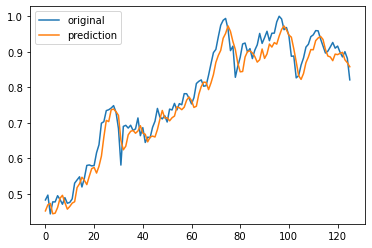

In [32]:
#Set the number of iterations for optimization process.
num_iteration = 500

for i in range(num_iteration+1):
  optimizer.zero_grad() # Why do we include this line?
  outputs = LSTM(x_train_seq)
  loss = criterion(outputs, y_train_seq)
  loss.backward() 
  optimizer.step()
  if i % 10 == 0:
    print('epoch: %d loss: %.7f' %(i, loss.item()))

# Compare the original and predicted price values via visualization. 
plt.plot(y_test_seq)
plt.plot(LSTM(x_test_seq).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()  